In [33]:
import warnings
warnings.filterwarnings('ignore')
import pickle
data = pickle.load(open('timeseries/timeseries3.pkl', 'rb')).values


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(data[:, :-1])

In [23]:
train_len = int(data.shape[0] * 0.7)
valid_len = int(data.shape[0] * 0.15)
train = data[:train_len, :]
valid = data[train_len:train_len+valid_len, :]
test = data[train_len+valid_len:, :]
train_X, train_y = train[:, :-1], train[:, -1]
valid_X, valid_y = valid[:, :-1], valid[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# 将数据集重构为符合LSTM要求的数据格式,即 [样本，时间步，特征]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
valid_X = valid_X.reshape((valid_X.shape[0], 1, valid_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, valid_X.shape, valid_y.shape, test_X.shape, test_y.shape)

(23441, 1, 5) (23441,) (5023, 1, 5) (5023,) (5024, 1, 5) (5024,)


In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping
model = Sequential()
model.add(LSTM(50, activation='relu',input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')  #loss='mae'
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                11200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 11251 (43.95 KB)
Trainable params: 11251 (43.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 44: early stopping


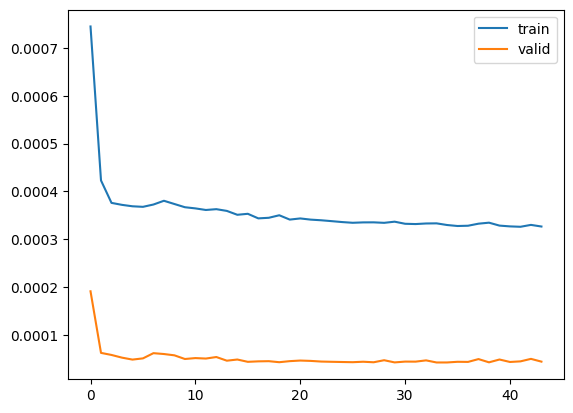

In [25]:
history = model.fit(train_X, train_y, epochs=100, batch_size=32, validation_data=(valid_X, valid_y),
                    verbose=-2, shuffle=False, callbacks = [
                    EarlyStopping(monitor='val_loss', patience=10, verbose=1)])
# plot history
import pylab as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

In [27]:
y_predict = scaler.inverse_transform(model.predict(train_X).reshape(-1, 1))

733/733 [==============================] - 1s 1ms/step


ValueError: non-broadcastable output operand with shape (23441,1) doesn't match the broadcast shape (23441,6)

In [28]:
import numpy as np
def wmapes(y_true, y_pred):
    return 1 - np.sum(np.abs(y_true - y_pred)) / np.sum(y_true)
wmapes(test_y, y_predict)

NameError: name 'y_predict' is not defined

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping
import os
import numpy as np
def wmapes(y_true, y_pred):
    return 1 - np.sum(np.abs(y_true - y_pred)) / np.sum(y_true)
ret = []

data = pickle.load(open(f'timeseries_1.pkl', 'rb')).values
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(data)
train_len = int(data.shape[0] * 0.7)
valid_len = int(data.shape[0] * 0.15)
train = data[:train_len, :]
valid = data[train_len:train_len+valid_len, :]
test = data[train_len+valid_len:, :]
train_X, train_y = train[:, :-1], train[:, -1]
valid_X, valid_y = valid[:, :-1], valid[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# 将数据集重构为符合LSTM要求的数据格式,即 [样本，时间步，特征]
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], 1))
valid_X = valid_X.reshape((valid_X.shape[0], valid_X.shape[1], 1))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], 1))
print(train_X.shape, train_y.shape, valid_X.shape, valid_y.shape, test_X.shape, test_y.shape)
model = Sequential()
model.add(LSTM(20, activation='relu',input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')  #loss='mae'
model.fit(train_X, train_y, epochs=100, batch_size=32, validation_data=(valid_X, valid_y),
                shuffle=False, callbacks = [
                EarlyStopping(monitor='val_loss', patience=10)])
y_predict = model.predict(test_X).reshape(1, -1)
model.save(f'LSTM/model.h5')
print(y_predict.shape)
print(test_y.shape)
print(sum(y_predict - test_y))
print(sum(test_y))
ret.append(wmapes(test_y, y_predict))
print(ret)

(171855, 43, 1) (171855,) (36826, 43, 1) (36826,) (36827, 43, 1) (36827,)
Epoch 1/100
 448/5371 [=>............................] - ETA: 37s - loss: 2.7691e-05

KeyboardInterrupt: 